<font color='green'> <font size = 8>     
## Efecto fotoeléctrico##

<font color='black'> <font size = 4>  

**Sánchez Cortés Miguel Ángel**  
Facultad de Ciencias, UNAM.
    
miguel.sanchezcortes@ciencias.unam.mx

<font color='black'> <font size = 4>  <div style="text-align: justify">
En este Notebook se realizan las gráficas para la relación entre el voltaje y la corrriente medidos en el arreglo experimental y se hace un ajuste lineal a los datos del voltaje de frenado y frecuencia mediante el método de Montecarlo.

In [53]:
#Importamos los paquetes
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import linecache
from scipy import optimize
import sklearn.metrics

matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

<font color='black'> <font size = 4>  <div style="text-align: justify">
Graficamos los datos para voltaje y corriente obtenidos.

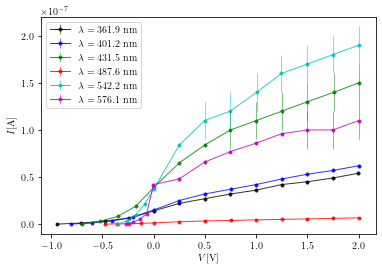

In [54]:
#lambda=361.9 data
x1 = np.array([-0.943, -0.707, -0.471, -0.236, 0.001, 0.251, 0.499, 0.750, 0.998, 1.250, 1.501, 1.751, 1.998])
dx1 = np.array([0.008,0.006,0.004,0.002,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y1 = np.array([0,1.1E-9,3.1E-9,6.5E-9,1.4E-8,2.2E-8,2.7E-8,3.2E-8,3.6E-8,4.2E-8,4.5E-8,4.9E-8,5.4E-8])
dy1 = np.array([2E-12,2E-10,2E-10,2E-10,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9])

#lambda=401.2 data
x2 = np.array([-0.804, -0.602, -0.402, -0.202, 0.001, 0.250, 0.498, 0.751, 1.000, 1.253, 1.500, 1.751, 2.002])
dx2 = np.array([0.006,0.005,0.003,0.002,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y2 = np.array([0,1.3E-9,3.4E-9,7.3E-9,1.5E-8,2.5E-8,3.2E-8,3.7E-8,4.2E-8,4.8E-8,5.3E-8,5.7E-8,6.2E-8])
dy2 = np.array([2E-12,2E-10,2E-10,2E-10,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9])

#lambda=431.5 data
x3 = np.array([-0.698, -0.524, -0.349, -0.174, 0.002, 0.250, 0.498, 0.750, 1.003, 1.252, 1.500, 1.758, 1.999])
dx3 = np.array([0.006,0.005,0.003,0.002,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y3 = np.array([0,2.9E-9,8.2E-9,1.9E-8,3.9E-8,6.5E-8,8.4E-8,1.0E-7,1.1E-7,1.2E-7,1.3E-7,1.4E-7,1.5E-7])
dy3 = np.array([2E-12,2E-10,2E-10,2E-9,2E-9,2E-9,2E-9,2E-8,2E-8,2E-8,2E-8,2E-8,2E-8])

#lambda=487.6 data
x4 = np.array([-0.478, -0.358, -0.239, -0.119, 0.001, 0.250, 0.498, 0.753, 1.001, 1.250, 1.499, 1.749, 2.002])
dx4 = np.array([0.006,0.005,0.003,0.002,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y4 = np.array([0,2.0E-10,4.0E-10,7.6E-10,1.3E-9,2.5E-9,3.3E-9,3.9E-9,4.5E-9,5.0E-9,5.5E-9,6.1E-9,6.6E-9])
dy4 = np.array([2E-12,6E-11,2E-11,3E-11,2E-10,2E-10,2E-10,2E-10,2E-10,2E-10,2E-10,2E-10,2E-10])

#lambda=542.2 data
x5 = np.array([-0.349, -0.262, -0.174, -0.088, 0.001, 0.251, 0.497, 0.748, 1.005, 1.247, 1.499, 1.750, 1.999])
dx5 = np.array([0.003,0.002,0.002,0.001,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y5 = np.array([0,3.5E-9,1.0E-8,2.1E-8,3.7E-8,8.4E-8,1.1E-7,1.2E-7,1.4E-7,1.6E-7,1.7E-7,1.8E-7,1.9E-7])
dy5 = np.array([2E-12,2E-10,1E-9,2E-9,2E-9,2E-9,2E-8,2E-8,2E-8,2E-8,2E-8,2E-8,2E-8])

#lambda=576.1 data
x6 = np.array([-0.270, -0.203, -0.135, -0.068, -0.001, 0.250, 0.500, 0.749, 1.000, 1.249, 1.498, 1.749, 2.001])
dx6 = np.array([0.002,0.002,0.001,0.001,0.001,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016])

y6 = np.array([0,1.9E-9,5.0E-9,1.1E-8,4.2E-8,4.8E-8,6.6E-8,7.7E-8,8.6E-8,9.6E-8,1.0E-7,1.0E-7,1.1E-7])
dy6 = np.array([2E-12,2E-10,2E-10,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-9,2E-8,2E-8,2E-8])

plt.errorbar(x1, y1, xerr=dx1, yerr=dy1, fmt=".-k", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =361.9$ nm')
plt.errorbar(x2, y2, xerr=dx2, yerr=dy2, fmt=".-b", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =401.2$ nm')
plt.errorbar(x3, y3, xerr=dx3, yerr=dy3, fmt=".-g", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =431.5$ nm')
plt.errorbar(x4, y4, xerr=dx4, yerr=dy4, fmt=".-r", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =487.6$ nm')
plt.errorbar(x5, y5, xerr=dx5, yerr=dy5, fmt=".-c", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =542.2$ nm')
plt.errorbar(x6, y6, xerr=dx6, yerr=dy6, fmt=".-m", elinewidth=0.6, capsize=0, linewidth=1, alpha=0.8, label='$\lambda =576.1$ nm')
plt.xlabel("$V$[V]")
plt.ylabel("$I$[A]")
plt.legend()

plt.savefig("I-V.png",dpi=300,bbox_inches="tight")

<font color='black'> <font size = 4>  <div style="text-align: justify">
Graficamos ahora los datos para el voltaje de frenado y la frecuencia de la luz.

Text(0, 0.5, '$V_{0}$')

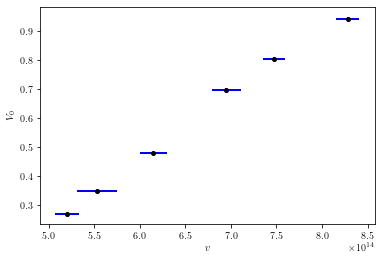

In [55]:
#lambda=361.9 data
v1 = np.array([0.942, 0.942, 0.944, 0.944, 0.945])
dv1 = 0.008
#lambda=401.2 data
v2 = np.array([0.804, 0.805, 0.804, 0.804, 0.804])
dv2 = 0.006
#lambda=431.5 data
v3 = np.array([0.698, 0.698, 0.698, 0.697, 0.698])
dv3 = 0.006
#lambda=487.6 data
v4 = np.array([0.471, 0.481, 0.481, 0.481, 0.478])
dv4 = 0.004
#lambda=542.2 data
v5 = np.array([0.348, 0.349, 0.350, 0.349, 0.350])
dv5 = 0.003
#lambda=576.1 data
v6 = np.array([0.270, 0.270, 0.271, 0.270, 0.271])
dv6 = 0.002

x_exp = np.array([8.28E+14,7.47E+14, 6.95E+14, 6.15E+14, 5.53E+14, 5.20E+14])
dx_exp = np.array([1.3E+13, 1.2E+13, 1.6E+13, 1.5E+13, 2.2E+13, 1.3E+13])

y_exp = np.array([np.mean(v1),np.mean(v2),np.mean(v3),np.mean(v4),np.mean(v5),np.mean(v6)])
dy_exp = np.array([math.sqrt(np.std(v1)**2 + dv1**2),math.sqrt(np.std(v2)**2 + dv2**2),math.sqrt(np.std(v3)**2 + dv3**2),math.sqrt(np.std(v4)**2 + dv4**2),math.sqrt(np.std(v5)**2 + dv5**2),math.sqrt(np.std(v6)**2 + dv6**2)])

plt.errorbar(x_exp,y_exp,xerr=dx_exp,yerr=dy_exp,lw=0,elinewidth=2,ecolor="b",fmt='ko',markersize=4)
plt.xlabel("$v$")
plt.ylabel("$V_{0}$")

<font color='black'> <font size = 4>  <div style="text-align: justify">
    
Para saber qué modelo ajustar, necesitamos un buen _prior_

- prior: cualquier cosa que me diga algo sobre lo que estoy observando

Para este ejemplo nuestro _prior_ será suponer que los datos siguen una tendencia que va como
$$
y \propto x
$$

Entonces el modelo que ajustaremos, siguiendo nuestro _prior_ será:

$$
y(x|m,b) = mx+b
$$

In [56]:
# Utilizamos nuestro prior y ajustamos el modelo elegido
def power_law(x,m,b):
    return m*x + b

In [57]:
# El prior del prior. Qué parámetros pienso yo que se le ajusta mejor a lo que veo.
vGuess = [4.0E-15,0.8] # Es a ojo 

# Hacemos el ajuste
vParams, aCova = optimize.curve_fit(power_law,x_exp,y_exp,vGuess)

<font color='black'> <font size = 4>  <div style="text-align: justify">
Observamos a qué parámetros se está ajustando:

In [58]:
vParams

array([ 2.24439065e-15, -8.89983034e-01])

Text(0, 0.5, '$eV_{0}$')

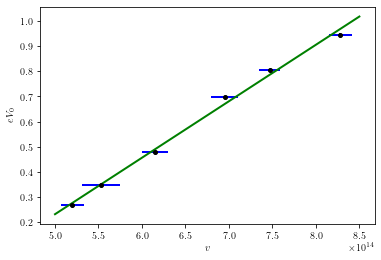

In [59]:
# Graficamos el ajuste con los datos
xmin = 5e+14
xmax = 8.5e+14
x_fine = np.linspace(xmin,xmax,100)
plt.errorbar(x_exp,y_exp, xerr=dx_exp,yerr=dy_exp,lw=0,elinewidth=2,ecolor="b",fmt='ko',markersize=4)
plt.plot(x_fine,power_law(x_fine,*vParams),"g-",lw=2)
plt.xlabel("$v$")
plt.ylabel("$eV_{0}$")

## Simulaciones MC

<font color='black'> <font size = 4>  <div style="text-align: justify">

Debido al número tan reducido de datos experimentales, crearemos de manera aleatoria, y usando como _prior_ los parámetros del ajuste anterior, una serie de datos experimentales sintéticos, los cuales ajustaremos con el modelo, con lo cual obtenedremos una distribución de valores para los parámetros. A esto lo llamaremos simulaciones MC.

In [60]:
# Definimos el número de simulaciones MC que realizaremos

n_sim = 50000
FitParams = np.array([])

<font color='black'> <font size = 4>  <div style="text-align: justify">
Cada experimento sintético consistirá en distribuir de manera aleatoria y uniforme los valores de $x$ (x_sim), tomaremos el ajuste anterior para crear la variable dependiente $y$ (y_gen) y, de manera aleatoria siguiendo una distribución normal, crearemos los errores "experimentales" para los nuevos datos sintéticos.

In [61]:
np.random.seed(1323623)
# Empieza el MC
for i in range(n_sim):
    x_sim = np.random.uniform(5.0e+14,8.5e+14,size=np.size(x_exp)) # ojo, esto es otro prior porque no tiene que ser uniforme
    y_gen = vParams[0]*x_sim+vParams[1] # Agarrar el ajuste anterior y ponerlo como prior de las simulaciones.
    y_sim = y_gen + np.random.normal(scale=dy_exp,size=np.size(y_gen)) # Creamos los errores sintéticos usando como media el error experimental real
    
    try:
        vsims, acova = optimize.curve_fit(power_law,x_sim,y_sim,vGuess)
    except:
        dumdum=1
        continue # Pasa al siguiente loop
        
    if np.size(FitParams) < 1:
        FitParams = np.copy(vsims)
    else:
        FitParams = np.vstack(( FitParams, vsims ))

<font color='black'> <font size = 4>  <div style="text-align: justify">
Graficamos las distribuciones de $m$ y $b$

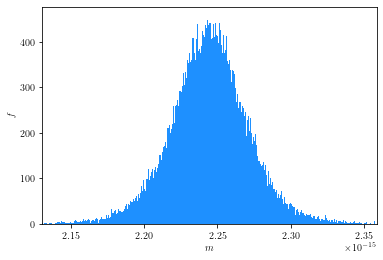

In [62]:
# Calculamos el valor medio de los parámetros m
med_a = np.median(FitParams[:,0])
std_a = np.std(FitParams[:,0])

plt.hist(FitParams[:,0],bins=1000, color ='dodgerblue')
plt.xlim(np.median(FitParams[:,0])-4*np.std(FitParams[:,0]),np.median(FitParams[:,0])+4*np.std(FitParams[:,0]))
plt.ylabel("$f$")
plt.xlabel("$m$")
plt.savefig("f-m.png",dpi=300,bbox_inches="tight")

<font color='black'> <font size = 4>  <div style="text-align: justify">
Observemos la media y distribución estándar del parámetro $m$:

In [63]:
np.std(FitParams[:,0])

2.855720171560539e-17

In [64]:
np.median(FitParams[:,0])

2.2445401831269862e-15

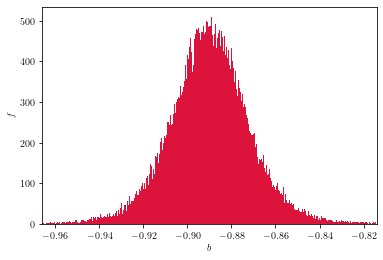

In [65]:
# Calculamos el valor medio de los parámetros b
med_b = np.median(FitParams[:,1])
std_b = np.std(FitParams[:,1])

hist_b = plt.hist(FitParams[:,1],bins=1000, color = 'crimson')
plt.xlim(-0.890-4*0.019,-0.890+4*0.019)
plt.ylabel("$f$")
plt.xlabel("$b$")
plt.savefig("f-b.png",dpi=300,bbox_inches="tight")

<font color='black'> <font size = 4>  <div style="text-align: justify">
Observemos la media y distribución estándar del parámetro $b$:

In [66]:
np.std(FitParams[:,1])

0.019487410851472993

In [67]:
np.median(FitParams[:,1])

-0.890102812361653

<font color='black'> <font size = 4>  <div style="text-align: justify">
Graficamos el fit promedio junto con todos los posibles valores obtenidos

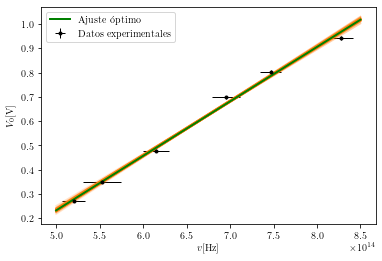

In [68]:
np.random.seed(1323623)
inds = np.random.randint(len(FitParams), size=100)

x_fine = np.linspace(xmin,xmax,100)
for ind in inds:
    params = FitParams[ind]
    plots = plt.plot(x_fine, power_law(x_fine,*params), "C1", alpha=0.2)
    

plt.plot(x_fine,power_law(x_fine,med_a,med_b),"g-",lw=2, label="Ajuste óptimo")
plt.errorbar(x_exp,y_exp,xerr=dx_exp,yerr=dy_exp,lw=0,elinewidth=1,ecolor="k",fmt='ko',markersize=3, label="Datos experimentales")
plt.xlabel("$v$[Hz]")
plt.ylabel("$V_{0}$[V]")
plt.legend()
plt.savefig("MC-h.png",dpi=300,bbox_inches="tight")

<font color='black'> <font size = 4>  <div style="text-align: justify">
Obtenemos el coeficiente de determinación $R^{2}$:

In [69]:
sklearn.metrics.r2_score(y_exp, power_law(x_exp,med_a,med_b))

0.9946330174447829